# UPPER PRIMARY RECRUITMENT BY WBCSSC ANALYSIS

## 1. PROBLEM STATEMENT
### HISTORY
In 20016 West Bengal Central School Service Commission advertised for recruitment of 14339 Upper Primary level teacher. There was allegation of various malpractice by the Commission, therefore a bunch of cases was filled before High Court of Calcutta. The court orderd to set aside the recruitment process and restart from beginning. In 2023 new panel and waiting list was published. The rule is, if a candidate give interview before commission, the candidate should be in the panel or waiting list. But again same allegation raises against the Commission as several hundred candidates didnt secure their place in panel or waiting list after interview and some candidate moved before the Court.
### STATEMENT
There are 4 types of allegation against the Commission that is cause for rejection of several hundred candidates:
* 1. TET score was changed
* 2. Academic score was changed
* 3. Untrained candidates are present in the panel
* 4. Less meritorius candidates empanelled

Our task is to find out the mismatch and investigate about allegation against WBCSSC in this pannel.

## 2. FORMALIZATION OF THE PROBLEM
We have to find out the answers of these questions:
* 1. How many candidates gave interview?
* 2. How many candidates are present in panel and waiting list?
* 3. How many unique candidates are present in panel and waiting list?
* 4. How many total vacancies are there?
* 5. How many vacancies left unfilled?
* 6. How many candidates TET score was changed?
* 7. How many candidates Academic score was changed?
* 8. Is there any untrained candidate present in the panel or waiting list?
* 9. Is there any miscalculation of some of scores?
* 10. Is there any extreme TET, academic or interview score that is unrealistic?

## 3. DATA COLLECTION AND PROCESSING
For analyzing the panel an waiting list, we need to collect and process:
* Panel data
* Waiting list data
* Interview list data
* Application form data of interviewed candidates
* Total vacancy

#### IMPORT NESSECERY LIBRARIES

In [81]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import fitz
import re

#### EXTRACT DATA FROM PDF
The commission published panel in pdf format in their website. we have to extract the data

In [82]:
def extract_data(path):
    pdf = fitz.open(path)
    data = []
    
    for page_number in range(pdf.page_count):
        page = pdf.load_page(page_number)
        text = page.get_text()
        
        cleaned_text = re.sub(r'^ROLL NO.*$|^TET\s+WEIGHTAGE\s+ACADEMIC\s+MARKS\s+PT\s+MARKS\s+MP\s+HS\s+GRAD\s+PROF\s+QUAL.*$', '', text, flags=re.MULTILINE)
        header_pattern = r'VACANCY\n(.*?)\n(.*?)\n(.*?)\n(.*?)\n\s+(\d+)\s+'
        header_match = re.findall(header_pattern, cleaned_text)
        
        for match in header_match:
            subject = match[0]
            medium = match[1]
            vcategory = match[2]
            vgender = match[3]
            vacancy = match[4]
            
        pattern = r'^([A-Z\s().]+)\n(\d{2}[-/]\d{2}[-/]\d{4})\n(MALE|FEMALE)\n([A-Z-]+)\n (\d{2}\.\d{4})\n([A-Z]+[\d-]+)\n (\d{12,14})\n (\d{1,4})\n (\d{2}\.\d{4})\n (\d{2})\n (\d+\.\d+)\n (\d+)\n (\d+)\n (\d+)\n (\d+)'
        matches = re.findall(pattern, cleaned_text, re.MULTILINE)
        
        for match in matches:
            data.append({
                "Sl": match[7],
                "Rank": match[8],     
                "Name": ''.join(match[0].split('\n')).strip(),
                "Roll No": match[6],
                "DOB": match[1],
                "Gender": match[2],
                "Caste": match[3],
                "Total Score": match[4],
                "TET Score": match[8],
                "Secondary": match[11],
                "HS": match[12],
                "Graduation": match[13],
                "Training": match[14],
                "Academic": match[9],
                "Interview": match[10],           
                "Subject": subject,
                "Medium": medium,
                "Vacancy Category": vcategory,
                "Gender Category": vgender,
                "Vacancy": vacancy
            })
            
    return pd.DataFrame(data)

### PANEL DATA

In [83]:
panel = extract_data('data/panel.pdf')
panel.head()

,Sl,Rank,Name,Roll No,DOB,Gender,Caste,Total Score,TET Score,Secondary,HS,Graduation,Training,Academic,Interview,Subject,Medium,Vacancy Category,Gender Category,Vacancy
0,1,29.6000,MUDASSER SK,20215100006156,09-03-1992,MALE,OBC-A,88.6000,29.6000,10,10,20,10,50,9.00,ARABIC(UP),BENGALI,GEN,MALE/FEMALE,143
1,2,28.5333,SHAIKH SARFARAJ HOSSAIN,40215170021008,03-04-1989,MALE,OBC-A,86.8633,28.5333,10,10,20,10,50,8.33,ARABIC(UP),BENGALI,GEN,MALE/FEMALE,143
2,3,32.0000,MD RAIHAN UDDIN,50215190004095,02-05-1992,MALE,GEN,86.6700,32.0000,10,10,18,8,46,8.67,ARABIC(UP),BENGALI,GEN,MALE/FEMALE,143
3,4,29.0667,MD JAKARIA,10215010012085,10-02-1991,MALE,OBC-A,86.0667,29.0667,10,10,20,10,50,7.00,ARABIC(UP),BENGALI,GEN,MALE/FEMALE,143
4,5,32.0000,SK SAJAHAN,10215020008889,13-04-1991,MALE,OBC-A,86.0000,32.0000,10,10,18,10,48,6.00,ARABIC(UP),BENGALI,GEN,MALE/FEMALE,143


### WAITING LIST DATA

In [84]:
waiting = extract_data('data/waiting.pdf')
waiting.head()

,Sl,Rank,Name,Roll No,DOB,Gender,Caste,Total Score,TET Score,Secondary,HS,Graduation,Training,Academic,Interview,Subject,Medium,Vacancy Category,Gender Category,Vacancy
0,1,25.0667,MD MAINUL HOQUE,20215090016166,12-07-1987,MALE,OBC-A,77.0667,25.0667,10,8,18,10,46,6.00,ARABIC(UP),BENGALI,GEN,MALE/FEMALE,143
1,2,25.0667,SK NASIRUDDIN,40215150010138,17-08-1988,MALE,OBC-A,77.0667,25.0667,10,8,18,10,46,6.00,ARABIC(UP),BENGALI,GEN,MALE/FEMALE,143
2,3,24.0000,MD ALI ASGAR,50215190024017,16-11-1990,MALE,OBC-A,77.0000,24.0000,10,8,18,10,46,7.00,ARABIC(UP),BENGALI,GEN,MALE/FEMALE,143
3,4,24.0000,MD SHAKIRUL HAQUE,20215100023347,20-01-1992,MALE,OBC-A,77.0000,24.0000,10,10,20,8,48,5.00,ARABIC(UP),BENGALI,GEN,MALE/FEMALE,143
4,5,22.6667,MD ISMAIL ALI,50215190018414,13-04-1991,MALE,OBC-A,76.9967,22.6667,10,8,20,10,48,6.33,ARABIC(UP),BENGALI,GEN,MALE/FEMALE,143


### VACANCY DATA

In [85]:
pdf = fitz.open("data/vacancy_ext.pdf")

data = []

for page_number in range(pdf.page_count):
    page = pdf.load_page(page_number)
    text = page.get_text()

    lines = text.split('\n')
    for i in range(len(lines)):
        if '(UP)' in lines[i]:
            subject = lines[i].strip()
            medium = lines[i+1].strip()
            category = lines[i+2].strip()
            gender = lines[i+3].strip()
            vacancy = lines[i+4].strip()
            
            data.append({'subject': subject, 'medium': medium, 'category': category, 'gender': gender, 'vacancy': vacancy})

vacancy = pd.DataFrame(data)
vacancy.head()

,subject,medium,category,gender,vacancy
0,ARABIC(UP),BENGALI,GEN,FEMALE,11
1,ARABIC(UP),BENGALI,GEN,MALE/FEMALE,143
2,ARABIC(UP),BENGALI,ОВС-А,FEMALE,13
3,ARABIC(UP),BENGALI,ОВС-А,MALE/FEMALE,79
4,ARABIC(UP),BENGALI,ОВС-В,FEMALE,1


### APPLICATION FORM DATA OF EACH CANDIDATES
The commission uploaded all the application forms who participated in interview. We have to scrap all the application forms using selenium. It is very big task, so shall do it in a separate file in and import csv here.

In [86]:
form_data = pd.read_csv('data/form_data.csv')
form_data.head()

/var/folders/7g/dml2wnxx3wsd3lcsg4ccbp340000gn/T/ipykernel_5040/540007690.py:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  form_data = pd.read_csv('data/form_data.csv')


,Application ID,Roll No,Name,Parent's Name,Date of Birth,Medium,Group,Subject,Gender,Category,MP FM,MP Obtained,MP Percentage,HS FM,HS Obtained,HS Percentage,Grad FM,Grad Obtained,Grad Percentage,Training FM,Training Obtained,Training Percentage,TET Percentage,Training,Present Scale,Fees Paid,Religion,Submitted On,Address 1,Address 2,District,PIN,Phone No,Email
0,2031615410101395,20215100003353,ABDUS SATTAR,AYNAL HAQUE,11-OCT-1991,BENGALI,LANGUAGE,ARABIC(UP),MALE,GENERAL,900,540,60% and Above,600,331,Below 60% to 50%,800,563,60% and Above,1100.0,752.0,60% and Above,61.3,B.ED.,N/A [FOR FRESHERS],Rs. 250,ISLAM,26-SEP-2016,VILLAGE- BANDKHALA,"PO- BANDKHALA, PS- NALHATI",BIRBHUM,731237,9874430905,abdussattarah@gmail.com
1,2031615410083084,10215030004546,KAZI MD ABDUR RAHIM,KAZI MD KOWSAR,24-OCT-1989,BENGALI,LANGUAGE,ARABIC(UP),MALE,GENERAL,1000,557,Below 60% to 50%,500,325,60% and Above,800,403,Below 60% to 50%,1400.0,995.0,60% and Above,68.7,B.ED.,N/A [FOR FRESHERS],Rs. 250,ISLAM,26-SEP-2016,VILL- MIRPARA,P.O.- DIHIBAGNAN,HOOGHLY,712613,9091986470,kazimdabdurrahim89@gmail.com
2,2031615410057792,30215130012685,MD ABDUL ALIM PIADA,MD MOFASSAL PIADA,01-JAN-1990,BENGALI,LANGUAGE,ARABIC(UP),MALE,GENERAL,900,540,60% and Above,500,348,60% and Above,800,505,60% and Above,800.0,493.0,60% and Above,62.0,B.ED.,N/A [FOR FRESHERS],Rs. 250,ISLAM,25-SEP-2016,VILL: KHERIA,PO: BHANGAN KHALI,SOUTH 24 PARGANAS,743329,9735932967,mou.bapi77@gmail.com
3,2031615410036440,20215090020273,MD ABDUR RAHIM,MD MERAJUDDIN,08-MAY-1992,BENGALI,LANGUAGE,ARABIC(UP),MALE,GENERAL,1000,580,Below 60% to 50%,500,305,60% and Above,1550,777,Below 60% to 50%,1400.0,842.0,60% and Above,65.3,B.ED.,N/A [FOR FRESHERS],Rs. 250,ISLAM,24-SEP-2016,"ASIR HAJI PARA, VILL AND PO- BALIADANGA",PS- KALIACHAK,MALDA,732201,9563517590,-
4,2031615410033348,20215100023193,MD ABDUR RAKIB,MD AZAHAR ALI,10-MAY-1991,BENGALI,LANGUAGE,ARABIC(UP),MALE,GENERAL,900,459,Below 60% to 50%,600,361,60% and Above,800,511,60% and Above,1000.0,733.0,60% and Above,62.0,B.ED.,N/A [FOR FRESHERS],Rs. 250,ISLAM,24-SEP-2016,VILL-KOLAN KASHIPUR PARA,"PO-KOLAN RADHAKANTAPUR, PS-RANITALA",MURSHIDABAD,742123,8670884865,abdurrakibmd786@gmail.com


### DATA PROCESSING
##### PANEL

In [87]:
panel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11672 entries, 0 to 11671
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Sl                11672 non-null  object
 1   Rank              11672 non-null  object
 2   Name              11672 non-null  object
 3   Roll No           11672 non-null  object
 4   DOB               11672 non-null  object
 5   Gender            11672 non-null  object
 6   Caste             11672 non-null  object
 7   Total Score       11672 non-null  object
 8   TET Score         11672 non-null  object
 9   Secondary         11672 non-null  object
 10  HS                11672 non-null  object
 11  Graduation        11672 non-null  object
 12  Training          11672 non-null  object
 13  Academic          11672 non-null  object
 14  Interview         11672 non-null  object
 15  Subject           11672 non-null  object
 16  Medium            11672 non-null  object
 17  Vacancy Cate

In [88]:
# Panel & waiting list
# All data type is objcet which is wrong. Change as suitable data type

panel = panel.astype({'Sl': int, 'Roll No': int, 'Total Score': float, 'TET Score': float, 'Secondary': float, 
                      'HS': float, 'Graduation': float, 'Training': float, 'Academic': float, 'Interview': float, 
                      'Vacancy': int})
waiting = waiting.astype({'Sl': int, 'Roll No': int, 'Total Score': float, 'TET Score': float, 'Secondary': float, 
                      'HS': float, 'Graduation': float, 'Training': float, 'Academic': float, 'Interview': float, 
                      'Vacancy': int})
panel.info()

print(f"\nTotal duplicate row in panel: {panel.duplicated().sum()}\nTotal null value in panel: {panel.isnull().sum().sum()}")
print(f"\nTotal duplicate row in waiting list: {waiting.duplicated().sum()}\nTotal null value in waiting list: {waiting.isnull().sum().sum()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11672 entries, 0 to 11671
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Sl                11672 non-null  int64  
 1   Rank              11672 non-null  object 
 2   Name              11672 non-null  object 
 3   Roll No           11672 non-null  int64  
 4   DOB               11672 non-null  object 
 5   Gender            11672 non-null  object 
 6   Caste             11672 non-null  object 
 7   Total Score       11672 non-null  float64
 8   TET Score         11672 non-null  float64
 9   Secondary         11672 non-null  float64
 10  HS                11672 non-null  float64
 11  Graduation        11672 non-null  float64
 12  Training          11672 non-null  float64
 13  Academic          11672 non-null  float64
 14  Interview         11672 non-null  float64
 15  Subject           11672 non-null  object 
 16  Medium            11672 non-null  object

In [89]:
# Vacancy
vacancy = vacancy.astype({'vacancy': int})
vacancy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   subject   354 non-null    object
 1   medium    354 non-null    object
 2   category  354 non-null    object
 3   gender    354 non-null    object
 4   vacancy   354 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 14.0+ KB


In [90]:
# Application form data cleaning
form_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16985 entries, 0 to 16984
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Application ID       16985 non-null  int64  
 1   Roll No              16985 non-null  int64  
 2   Name                 16985 non-null  object 
 3   Parent's Name        16985 non-null  object 
 4   Date of Birth        16985 non-null  object 
 5   Medium               16985 non-null  object 
 6   Group                16985 non-null  object 
 7   Subject              16985 non-null  object 
 8   Gender               16985 non-null  object 
 9   Category             16985 non-null  object 
 10  MP FM                16985 non-null  object 
 11  MP Obtained          16985 non-null  object 
 12  MP Percentage        16983 non-null  object 
 13  HS FM                16985 non-null  object 
 14  HS Obtained          16985 non-null  object 
 15  HS Percentage        16983 non-null 

In [91]:
# Some field has mismatch of data, that cause some int field to object. lets process

pd.set_option('display.max_columns', None)

fields = ['MP FM', 'MP Obtained', 'HS FM', 'HS Obtained', 'Grad Obtained']

pattern = r'[^0-9.]'

for field in fields:
    mismatch_rows = form_data[
        form_data[field].astype(str).str.contains(pattern, na=False) |
        (form_data[field] == '')
    ]
    print(mismatch_rows[['Roll No', 'MP FM', 'MP Obtained', 'HS FM', 'HS Obtained', 'Grad Obtained']])

              Roll No MP FM MP Obtained HS FM HS Obtained Grad Obtained
4748   30115130001932     -           -     -           -           428
16707  30215110009193     -           -     -           -           381
              Roll No MP FM MP Obtained HS FM HS Obtained Grad Obtained
4748   30115130001932     -           -     -           -           428
16707  30215110009193     -           -     -           -           381
              Roll No MP FM MP Obtained HS FM HS Obtained Grad Obtained
4748   30115130001932     -           -     -           -           428
16707  30215110009193     -           -     -           -           381
              Roll No MP FM MP Obtained HS FM HS Obtained Grad Obtained
4748   30115130001932     -           -     -           -           428
16707  30215110009193     -           -     -           -           381
            Roll No MP FM MP Obtained HS FM HS Obtained Grad Obtained
15328  212015901275   800         489  1000         536          7

In [92]:
# Fill all null values with 0 and convert values to number

form_data['MP FM'] = pd.to_numeric(form_data['MP FM'].replace('-', '0').fillna(0), errors='coerce')
form_data['MP Obtained'] = pd.to_numeric(form_data['MP Obtained'].replace('-', '0').fillna(0), errors='coerce')
form_data['HS FM'] = pd.to_numeric(form_data['HS FM'].replace('-', '0').fillna(0), errors='coerce')
form_data['HS Obtained'] = pd.to_numeric(form_data['HS Obtained'].replace('-', '0').fillna(0), errors='coerce')
form_data['Grad FM'] = pd.to_numeric(form_data['Grad FM'].replace('7¿21', '721').fillna(0), errors='coerce')
form_data['Grad Obtained'] = pd.to_numeric(form_data['Grad Obtained'].replace('-', '0').fillna(0), errors='coerce')
form_data['Training FM'] = pd.to_numeric(form_data['Training FM'].replace('-', '0').fillna(0), errors='coerce')
form_data['Training Obtained'] = pd.to_numeric(form_data['Training Obtained'].replace('-', '0').fillna(0), errors='coerce')

In [93]:
form_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16985 entries, 0 to 16984
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Application ID       16985 non-null  int64  
 1   Roll No              16985 non-null  int64  
 2   Name                 16985 non-null  object 
 3   Parent's Name        16985 non-null  object 
 4   Date of Birth        16985 non-null  object 
 5   Medium               16985 non-null  object 
 6   Group                16985 non-null  object 
 7   Subject              16985 non-null  object 
 8   Gender               16985 non-null  object 
 9   Category             16985 non-null  object 
 10  MP FM                16985 non-null  int64  
 11  MP Obtained          16985 non-null  float64
 12  MP Percentage        16983 non-null  object 
 13  HS FM                16985 non-null  int64  
 14  HS Obtained          16985 non-null  float64
 15  HS Percentage        16983 non-null 

## 4. DATA ANALYSIS
### VISUALIZE DATA DISTRIBUTION IN APPLICATION FORM FILLED BY THE CANDIDATE

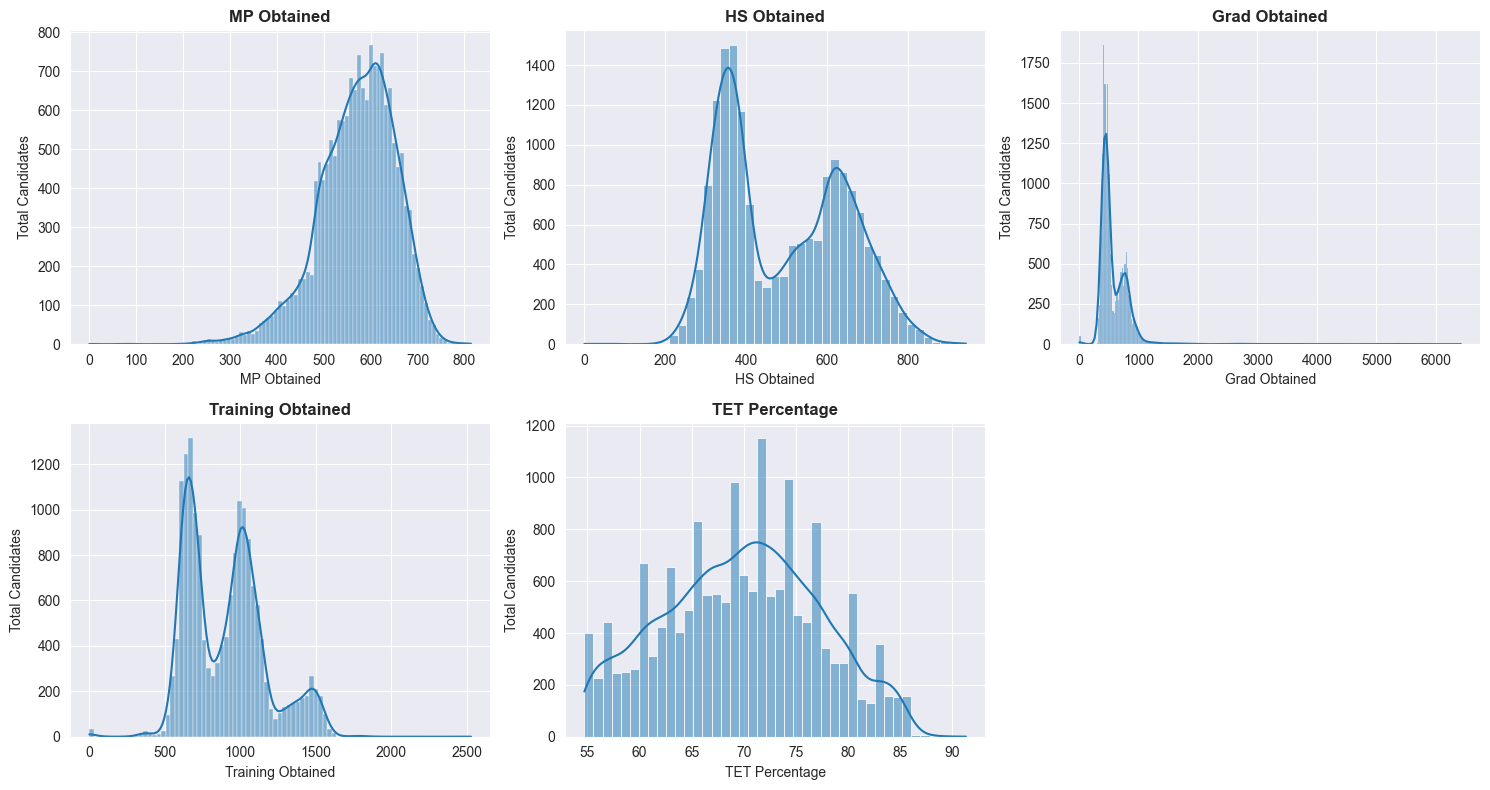

In [94]:
# Columns in form data for visualize distribution

columns = ['MP Obtained', 'HS Obtained', 'Grad Obtained', 'Training Obtained', 'TET Percentage']

sns.set_style("darkgrid")
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for i, column in enumerate(columns):
    sns.histplot(form_data[column], kde=True, ax=axes[i])
    axes[i].set_title(column, fontweight='bold')
    axes[i].set_ylabel('Total Candidates')

# Hide empty subplots
for j in range(len(columns), len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

### VISUALIZE DATA DISTRIBUTION IN PANEL 

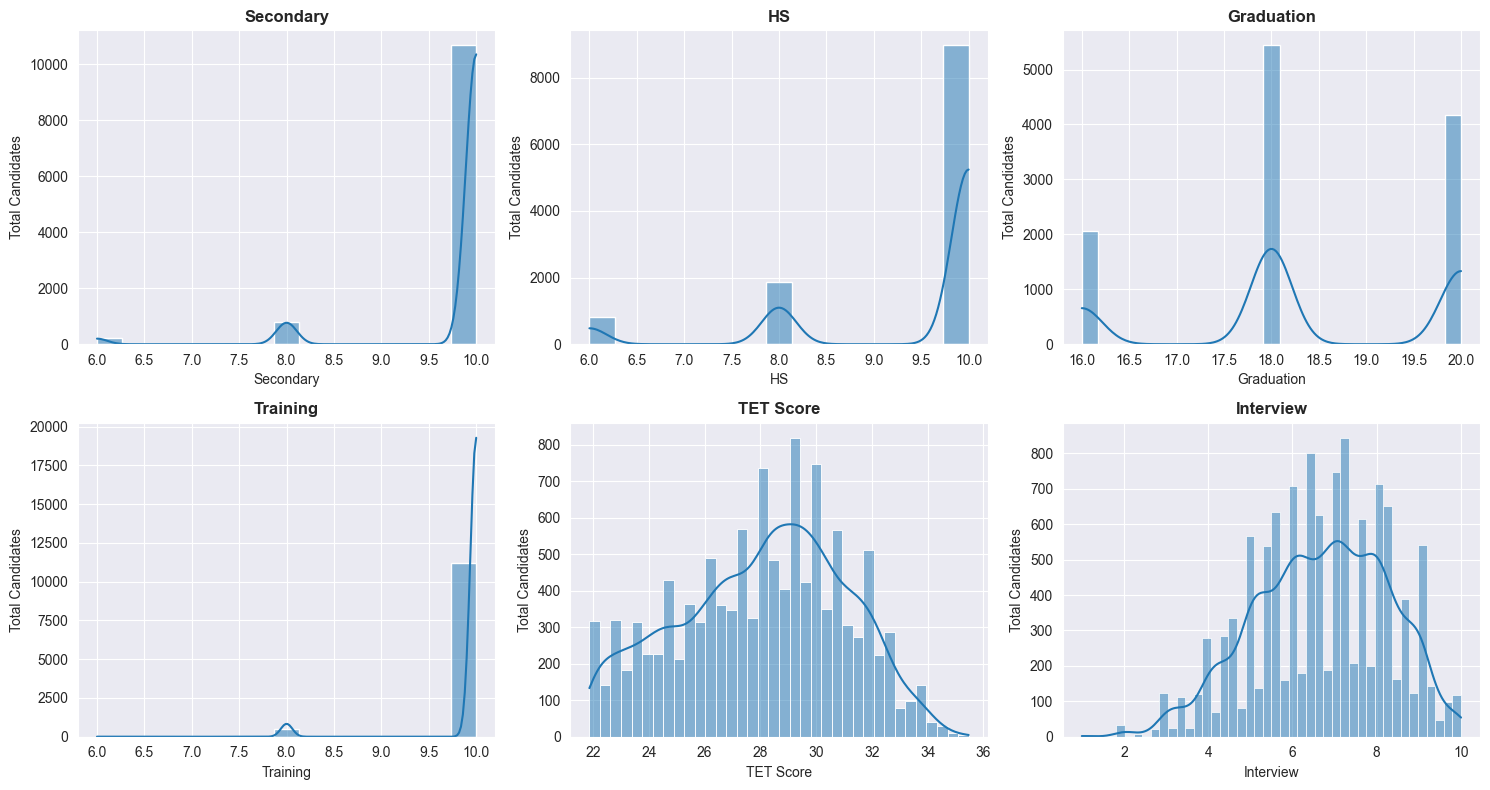

In [95]:
# Columns in form data for visualize distribution

columns = ['Secondary', 'HS', 'Graduation', 'Training', 'TET Score', 'Interview']

sns.set_style("darkgrid")
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for i, column in enumerate(columns):
    sns.histplot(panel[column], kde=True, ax=axes[i])
    axes[i].set_title(column, fontweight='bold')
    axes[i].set_ylabel('Total Candidates')

# Hide empty subplots
for j in range(len(columns), len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

### VISUALIZE DATA DISTRIBUTION IN WAITING LIST

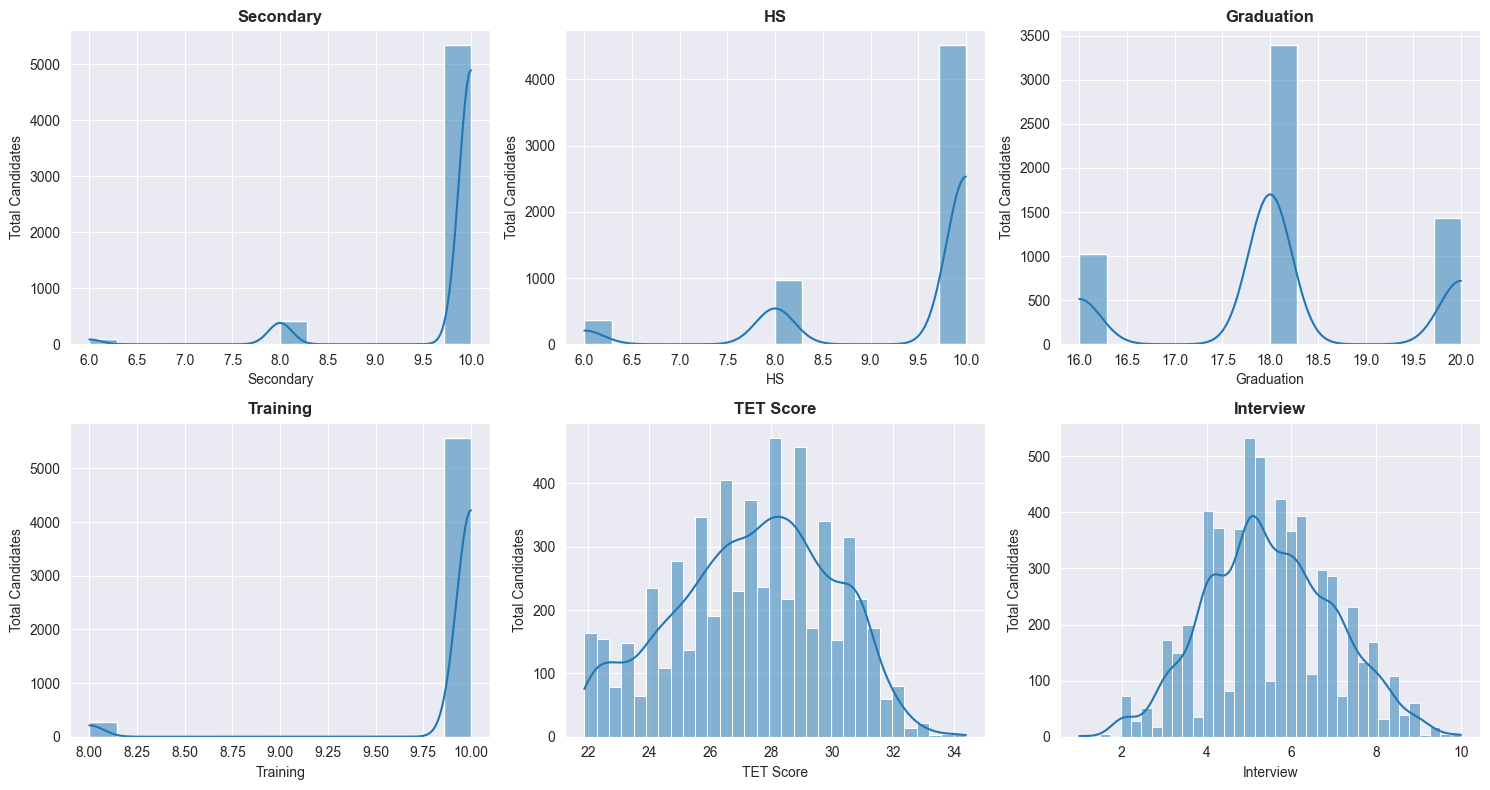

In [96]:
# Columns in form data for visualize distribution

columns = ['Secondary', 'HS', 'Graduation', 'Training', 'TET Score', 'Interview']

sns.set_style("darkgrid")
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for i, column in enumerate(columns):
    sns.histplot(waiting[column], kde=True, ax=axes[i])
    axes[i].set_title(column, fontweight='bold')
    axes[i].set_ylabel('Total Candidates')

# Hide empty subplots
for j in range(len(columns), len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

##### OBSERVATION
* Panel and waiting list data distribution is normal, there is no extreme values
* There are extreme data distribution in form data that was filled up by candidates
* we have to make boxplots for form data to visualize extreme values

### VISUALIZE EXTREME VALUES IN FORM DATA

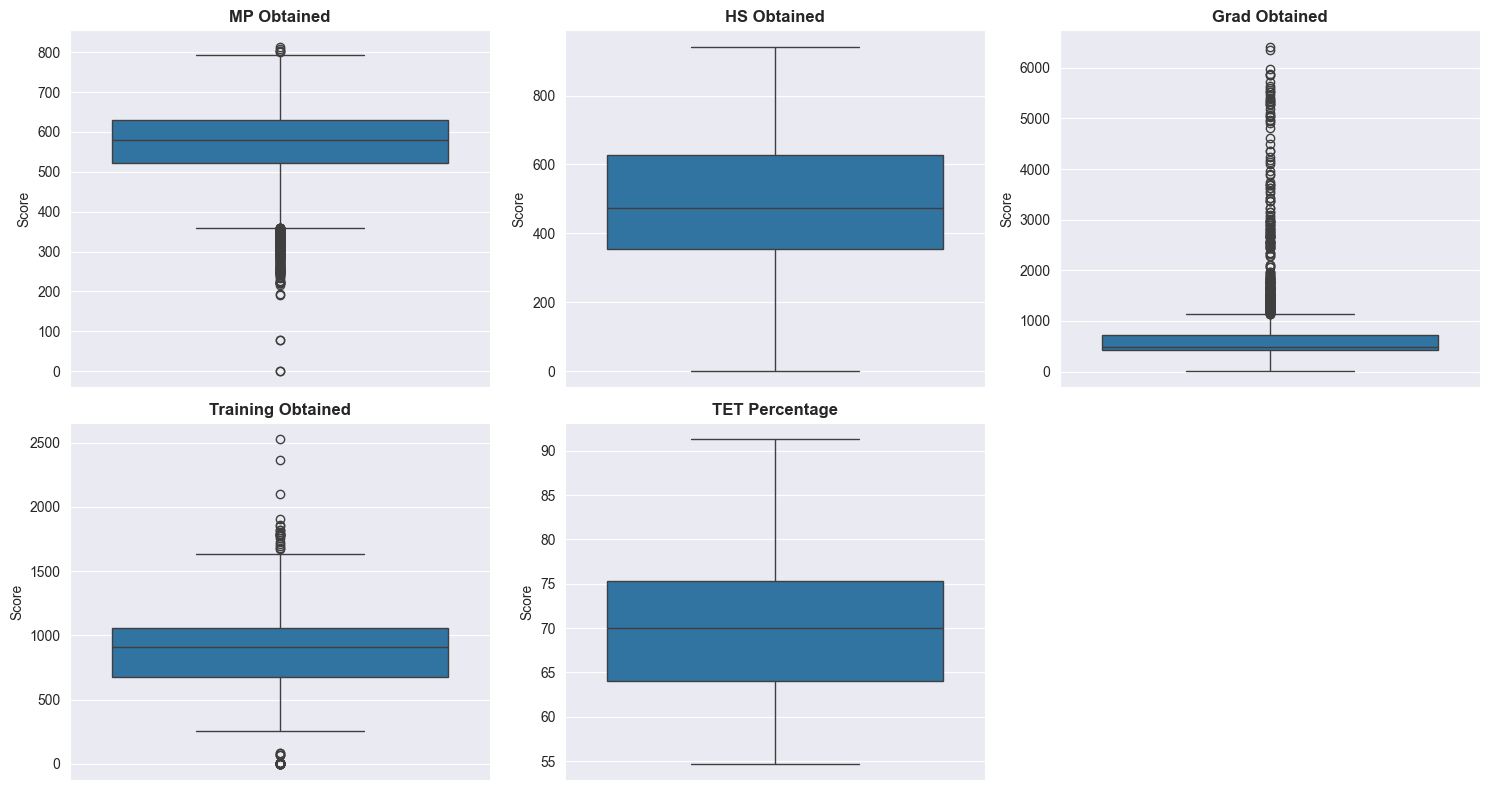

In [97]:
# Columns in form data for visualize distribution

columns = ['MP Obtained', 'HS Obtained', 'Grad Obtained', 'Training Obtained', 'TET Percentage']

sns.set_style("darkgrid")
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

for i, column in enumerate(columns):
    sns.boxplot(form_data[column], ax=axes[i])
    axes[i].set_title(column, fontweight='bold')
    axes[i].set_ylabel('Score')

# Hide empty subplots
for j in range(len(columns), len(axes)):
    axes[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()

##### OBSERVATION
* There are some extreme values in MP Obtained, Grad Obtained and Training Obtained Column
* HS Obtained and TET Percentage column seems normal

### FIND OUTLIERS
#### OUTLIERS IN MP/SECONDARY
We can find outliers traditionally with iqr rule and z-index rule, But here situation different. Beyond full marks  and 30% of full marks are outliers.

In [98]:
mp_outliers = form_data[(form_data['MP Obtained'] >= form_data['MP FM']) | (form_data['MP Obtained'] / form_data['MP FM'] * 100 < 30)]
mp_outliers

,Application ID,Roll No,Name,Parent's Name,Date of Birth,Medium,Group,Subject,Gender,Category,MP FM,MP Obtained,MP Percentage,HS FM,HS Obtained,HS Percentage,Grad FM,Grad Obtained,Grad Percentage,Training FM,Training Obtained,Training Percentage,TET Percentage,Training,Present Scale,Fees Paid,Religion,Submitted On,Address 1,Address 2,District,PIN,Phone No,Email
4748,2031601450099876,30115130001932,KRIPASINDHUHALDER,LATE SURYA KANTA HALDER,05-APR-1978,BENGALI,MATHEMATICS AND SCIENCE,BIO. SCIENCE(UP),MALE,SCHEDULE CASTE,0,0.000,NaN,0,0.0,NaN,900,428.00,Below 50%,1000.0,627.00,60% and Above,56.7,B.ED.,N/A [FOR FRESHERS],Rs. 80,HINDUISM,26-SEP-2016,"VILL+PO-BAZAR BERIA,",PS-MANDIR BAZAR,SOUTH 24 PARGANAS,743395,8145176132,-
5844,2031615470228630,30215130023263,PUBALI JASHU,ANANTA KUMAR JASHU,01-OCT-1989,BENGALI,LANGUAGE,ENGLISH(UP),FEMALE,GENERAL,617,77.130,60% and Above,361,72.2,60% and Above,442,55.25,Below 60% to 50%,1146.0,81.86,60% and Above,80.0,B.ED.,N/A [FOR FRESHERS],Rs. 250,HINDUISM,30-SEP-2016,"VILL-SENPUKUR, P.O-UTTAR RAIPUR",P.S-BUDGE BUDGE,SOUTH 24 PARGANAS,700137,9051079800,pubalijashu@gmail.com
14876,2031601460160779,50115180005797,DEBASISH SARKAR,DIBAKAR SARKAR,15-JUN-1989,BENGALI,MATHEMATICS AND SCIENCE,PURE SCIENCE(UP),MALE,SCHEDULE CASTE,800,78.625,60% and Above,500,309.0,60% and Above,10,7.49,60% and Above,1400.0,1139.00,60% and Above,66.0,D.EL.ED.,N/A [FOR FRESHERS],Rs. 80,HINDUISM,27-SEP-2016,VILL + PO.- DARAPPUR,PS- CHAKDAHA,NADIA,741223,8670368281,debacse08@gmail.com
15304,2031601460051924,50115190000273,SANDIP SARKAR,LATE KEDAR CHANDRA SARKAR,11-MAY-1984,BENGALI,MATHEMATICS AND SCIENCE,PURE SCIENCE(UP),MALE,SCHEDULE CASTE,8000,674.000,60% and Above,1000,718.0,60% and Above,1200,687.00,Below 60% to 50%,1400.0,1065.00,60% and Above,64.0,B.ED.,N/A [FOR FRESHERS],Rs. 80,HINDUISM,24-SEP-2016,MASLANDAPURI(TINAMTALA),"MASLANDAPUR, HABRA",NORTH 24 PARGANAS,743289,9143042694,sarkarsandip2013@gmail.com
16707,2031615550031576,30215110009193,SUVENDU DOLUI,SUKUMAR DOLUI,05-DEC-1989,BENGALI,LANGUAGE,SANSKRIT(UP),MALE,SCHEDULE CASTE,0,0.000,NaN,0,0.0,NaN,800,381.00,Below 50%,1000.0,646.00,60% and Above,85.3,B.ED.,N/A [FOR FRESHERS],Rs. 80,HINDUISM,24-SEP-2016,VILL- KASHMOLI,PO- KASHMOLI. PS- JOYPUR,HOWRAH,711303,8609268307,-


##### OBSERVATIONS
* 5 candidates number are very extreme
* 2 candidates put 0 in the place of marks
* Possible cause of this wrongly filled up form by them

#### OUTLIERS IN HIGHER SECONDARY

In [99]:
hs_outliers = form_data[(form_data['HS Obtained'] >= form_data['HS FM']) | (form_data['HS Obtained'] / form_data['HS FM'] * 100 < 30)]
print('Total outliers:', hs_outliers['Roll No'].nunique())
hs_outliers.head()

Total outliers: 7


,Application ID,Roll No,Name,Parent's Name,Date of Birth,Medium,Group,Subject,Gender,Category,MP FM,MP Obtained,MP Percentage,HS FM,HS Obtained,HS Percentage,Grad FM,Grad Obtained,Grad Percentage,Training FM,Training Obtained,Training Percentage,TET Percentage,Training,Present Scale,Fees Paid,Religion,Submitted On,Address 1,Address 2,District,PIN,Phone No,Email
3913,2031601450089033,30115130000276,SAFIULLAH MOLLA,MOHAMMAD ALI MOLLA,05-FEB-1972,BENGALI,MATHEMATICS AND SCIENCE,BIO. SCIENCE(UP),MALE,OBC-A,900,534.00,Below 60% to 50%,1000,45.000,Below 50%,1250,672.00,Below 60% to 50%,1200.0,814.00,60% and Above,64.0,B.ED.,N/A [FOR FRESHERS],Rs. 250,ISLAM,26-SEP-2016,PIYADAPARA,BARUIPUR,SOUTH 24 PARGANAS,700144,9831530583,mollasafiullah@gmail.com
4748,2031601450099876,30115130001932,KRIPASINDHUHALDER,LATE SURYA KANTA HALDER,05-APR-1978,BENGALI,MATHEMATICS AND SCIENCE,BIO. SCIENCE(UP),MALE,SCHEDULE CASTE,0,0.00,NaN,0,0.000,NaN,900,428.00,Below 50%,1000.0,627.00,60% and Above,56.7,B.ED.,N/A [FOR FRESHERS],Rs. 80,HINDUISM,26-SEP-2016,"VILL+PO-BAZAR BERIA,",PS-MANDIR BAZAR,SOUTH 24 PARGANAS,743395,8145176132,-
5844,2031615470228630,30215130023263,PUBALI JASHU,ANANTA KUMAR JASHU,01-OCT-1989,BENGALI,LANGUAGE,ENGLISH(UP),FEMALE,GENERAL,617,77.13,60% and Above,361,72.200,60% and Above,442,55.25,Below 60% to 50%,1146.0,81.86,60% and Above,80.0,B.ED.,N/A [FOR FRESHERS],Rs. 250,HINDUISM,30-SEP-2016,"VILL-SENPUKUR, P.O-UTTAR RAIPUR",P.S-BUDGE BUDGE,SOUTH 24 PARGANAS,700137,9051079800,pubalijashu@gmail.com
6113,2031615470097807,30215130015975,MD JALALUDDIN MOLLA,MD AKAMUDDIN MOLLA,05-JUN-1989,BENGALI,LANGUAGE,ENGLISH(UP),MALE,OBC-A,800,688.00,60% and Above,500,0.338,60% and Above,1550,835.00,Below 60% to 50%,1000.0,669.00,60% and Above,76.7,B.ED.,N/A [FOR FRESHERS],Rs. 250,ISLAM,26-SEP-2016,VILL- UTTAR KALASH,"P.O- KALASH, P.S- MAGRAHAT",SOUTH 24 PARGANAS,743609,8926582074,-
14913,2031601460050964,50115180001876,DIPANKAR BISWAS,KESTO BISWAS,19-JUL-1986,BENGALI,MATHEMATICS AND SCIENCE,PURE SCIENCE(UP),MALE,SCHEDULE CASTE,800,561.00,60% and Above,1000,55.800,Below 60% to 50%,1550,827.00,Below 60% to 50%,1000.0,567.00,Below 60% to 45%,68.7,B.ED.,N/A [FOR FRESHERS],Rs. 80,HINDUISM,24-SEP-2016,"NAME- DIPANKAR BISWAS, C\O- KESTO BISWAS","ADD- M.G. ROAD, MANIKPARA, P.O.- KRISHNAGAR, P...",NADIA,741101,9933538034,dipankarbiswas_mail@rediffmail.com


##### OBSERVATIONS
* 7 candidates marks are extreme
* Possible cause of the extreme marks are wrongly filled up forms

#### OUTLIERS IN GRADUATION

In [100]:
general_condition = (form_data['Category'] == 'GENERAL') & (form_data['Grad Obtained'] / form_data['Grad FM'] * 100 < 50)
other_condition = (form_data['Category'] != 'GENERAL') & ((form_data['Grad Obtained'] >= form_data['Grad FM']) | (form_data['Grad Obtained'] / form_data['Grad FM'] * 100 < 45))
combined_condition = general_condition | other_condition

grad_outliers = form_data[combined_condition]
print('Total outliers:', grad_outliers['Roll No'].nunique())
grad_outliers.head()

Total outliers: 1206


,Application ID,Roll No,Name,Parent's Name,Date of Birth,Medium,Group,Subject,Gender,Category,MP FM,MP Obtained,MP Percentage,HS FM,HS Obtained,HS Percentage,Grad FM,Grad Obtained,Grad Percentage,Training FM,Training Obtained,Training Percentage,TET Percentage,Training,Present Scale,Fees Paid,Religion,Submitted On,Address 1,Address 2,District,PIN,Phone No,Email
43,2031615410196333,212011104296,ANOWARUL HOQUE,LATE ABDUS SALAM,15-NOV-1979,BENGALI,LANGUAGE,ARABIC(UP),MALE,OBC-A,1000,463.0,Below 50%,1000,475.0,Below 50%,1400,593.0,Below 50%,1000.0,583.0,Below 60% to 45%,77.8,B.ED.,N/A [FOR FRESHERS],Rs. 250,ISLAM,28-SEP-2016,VILL-NOMUNIA,P.O-NOMUNIA,UTTAR DINAJPUR,733128,9735950834,-
53,2031615410153404,212014100563,FARHAD JUBAIR,MD ASHRAF ALI,07-MAR-1988,BENGALI,LANGUAGE,ARABIC(UP),MALE,OBC-A,800,480.0,60% and Above,1000,450.0,Below 50%,1400,585.0,Below 50%,600.0,414.0,60% and Above,61.1,B.ED.,N/A [FOR FRESHERS],Rs. 250,ISLAM,27-SEP-2016,VILL AND PO- JADUPUR,PS- KALIACHAK,MALDA,732212,8768986829,fjub920@gmail.com
57,2031615410297715,512014100010,HAIDER ALI MANDAL,JAHAN ALI MANDAL,02-MAR-1981,BENGALI,LANGUAGE,ARABIC(UP),MALE,OBC-A,1000,453.0,Below 50%,1000,364.0,Below 50%,1350,561.0,Below 50%,1200.0,789.0,60% and Above,60.0,B.ED.,N/A [FOR FRESHERS],Rs. 250,ISLAM,03-OCT-2016,VILL+PO-BHANDERKOLA,PS-GOPALNAGAR,NORTH 24 PARGANAS,743701,7407620804,-
59,2031615410216295,20215090017779,HAZRUL ISLAM,MD FURSED ALI,29-APR-1985,BENGALI,LANGUAGE,ARABIC(UP),MALE,OBC-A,800,350.0,Below 50%,1000,417.0,Below 50%,1350,555.0,Below 50%,1200.0,791.0,60% and Above,60.7,B.ED.,N/A [FOR FRESHERS],Rs. 250,ISLAM,29-SEP-2016,VILL-PIPOLTALA,"PO- DALLUGRAM, PS- KALIACHAK",MALDA,732201,9734120421,-
111,2031615410071535,20215090019773,MD HABIBUR RAHMAN,MD HAKIMUDDIN SARDAR,23-MAR-1981,BENGALI,LANGUAGE,ARABIC(UP),MALE,OBC-A,1000,514.0,Below 60% to 50%,1000,461.0,Below 50%,1350,568.0,Below 50%,1200.0,877.5,60% and Above,63.3,B.ED.,N/A [FOR FRESHERS],Rs. 250,ISLAM,25-SEP-2016,VILL SABDANAGAR,"PO JAMIRGHATA, PS KALIACHAK",MALDA,732206,9733176648,mdhabiburklc123@gmail.com


##### OBSERVATIONS
* There are total 1207 outliers
* Most of them are not qualified as per the rule of WBCSSC
* Some persons made mistake to fill form, But maximum candidates are ineligible
* There is chance of malpractise by WBCSSC

#### OUTLIERS IN TRAINING

In [129]:
training_outliers = form_data[(form_data['Training Obtained'] >= form_data['Training FM']) | (form_data['Training Obtained'] / form_data['Training FM'] * 100 < 30) ]
print('Total outliers:', training_outliers['Roll No'].nunique())
training_outliers.head()

Total outliers: 25


,Application ID,Roll No,Name,Parent's Name,Date of Birth,Medium,Group,Subject,Gender,Category,MP FM,MP Obtained,MP Percentage,HS FM,HS Obtained,HS Percentage,Grad FM,Grad Obtained,Grad Percentage,Training FM,Training Obtained,Training Percentage,TET Percentage,Training,Present Scale,Fees Paid,Religion,Submitted On,Address 1,Address 2,District,PIN,Phone No,Email,TET Weightage
2796,2031601450064895,30115120002567,ANINDITA DEY SEN,RABINDRA NATH SEN,06-JUN-1982,BENGALI,MATHEMATICS AND SCIENCE,BIO. SCIENCE(UP),FEMALE,GENERAL,800,614.0,60% and Above,1000,560.0,Below 60% to 50%,1350,846.00,60% and Above,1950.0,80.0,60% and Above,66.7,D.EL.ED.,N/A [FOR FRESHERS],Rs. 250,HINDUISM,25-SEP-2016,75 BUTTO KRISTO PAUL AVENUE,-,KOLKATA,700005,9830467930,aumordey70@gmail.com,26.68
3087,2031601450057350,30115110003954,MANASHI MAITY,MRITUNJOY MAITY,18-SEP-1988,BENGALI,MATHEMATICS AND SCIENCE,BIO. SCIENCE(UP),FEMALE,GENERAL,800,543.0,60% and Above,1000,464.0,60% and Above,1300,749.00,60% and Above,0.0,0.0,60% and Above,68.0,NaN,N/A [FOR FRESHERS],Rs. 250,HINDUISM,25-SEP-2016,"VILL - ANTILA, P.O. - ANTILA, P.S. - BAGNAN",BLOCK - BAGNAN II,HOWRAH,711312,9800722163,-,27.20
4036,2031601450142755,20115100002651,NOORAMINAGULSAN,AMINUL HAQUE,07-FEB-1989,BENGALI,MATHEMATICS AND SCIENCE,BIO. SCIENCE(UP),FEMALE,OBC-A,800,501.0,60% and Above,1000,645.0,60% and Above,1350,744.00,Below 60% to 50%,1000.0,65.0,60% and Above,66.7,B.ED.,N/A [FOR FRESHERS],Rs. 250,ISLAM,27-SEP-2016,VILLAGE - KALIKAHARA RATHER PARA,"POST OFFICE - FARIDPUR, POLICE STATION - JALAN...",MURSHIDABAD,742303,8697229636,nooraminagulsan@gmail.com,26.68
5094,2031601450023209,312014503161,JOITI MISTRI,JYOTI BIKASH MISTRI,14-NOV-1988,BENGALI,MATHEMATICS AND SCIENCE,BIO. SCIENCE(UP),FEMALE,SCHEDULE CASTE,600,379.0,60% and Above,700,359.0,Below 60% to 50%,1300,614.00,Below 50%,0.0,0.0,60% and Above,62.2,B.ED.,N/A [FOR FRESHERS],Rs. 80,HINDUISM,24-SEP-2016,P-19 BANK GARDENS,"ROY NAGAR, BANSDRONI",KOLKATA,700070,9883504698,joiti_14@yahoo.co.in,24.88
5325,2031601450072616,30115130002886,PALLAVI GHOSH MOULICK MITRA,SUSHANTA KRISHNA GHOSH MOULICK,14-FEB-1976,HINDI,MATHEMATICS AND SCIENCE,BIO. SCIENCE(UP),FEMALE,GENERAL,900,629.0,60% and Above,900,564.0,60% and Above,1200,734.16,60% and Above,0.0,0.0,60% and Above,63.3,NaN,N/A [FOR FRESHERS],Rs. 250,HINDUISM,25-SEP-2016,"S. D. PLOT, KUSUMBA,",NEAR SENBO INDUSTRIES,SOUTH 24 PARGANAS,700103,9433539490,pmitra142@gmail.com,25.32


##### OBSERVATIONS
* There are total 25 outliers
* Most of them are untrained as not qualified as per the rule of WBCSSC
* Some persons made mistake to fill form, But maximum candidates are ineligible
* There is chance of malpractise by WBCSSC

### COMBINE ALL OUTLIERS

In [102]:
combined_outliers = pd.concat([mp_outliers, hs_outliers, grad_outliers, training_outliers], ignore_index=True)
unique_roll_numbers = combined_outliers['Roll No'].unique()
combined_outliers = combined_outliers[combined_outliers['Roll No'].isin(unique_roll_numbers)].drop_duplicates(subset=['Roll No'], keep='first')
combined_outliers = combined_outliers[['Roll No', 'Name', 'Category', 'MP FM', 'MP Obtained', 'HS FM', 'HS Obtained', 'Grad FM', 'Grad Obtained', 'Training FM', 'Training Obtained']]
print('Total combined unique outliers:', combined_outliers['Roll No'].nunique())
combined_outliers.head()

Total combined unique outliers: 1231


,Roll No,Name,Category,MP FM,MP Obtained,HS FM,HS Obtained,Grad FM,Grad Obtained,Training FM,Training Obtained
0,30115130001932,KRIPASINDHUHALDER,SCHEDULE CASTE,0,0.000,0,0.0,900,428.00,1000.0,627.00
1,30215130023263,PUBALI JASHU,GENERAL,617,77.130,361,72.2,442,55.25,1146.0,81.86
2,50115180005797,DEBASISH SARKAR,SCHEDULE CASTE,800,78.625,500,309.0,10,7.49,1400.0,1139.00
3,50115190000273,SANDIP SARKAR,SCHEDULE CASTE,8000,674.000,1000,718.0,1200,687.00,1400.0,1065.00
4,30215110009193,SUVENDU DOLUI,SCHEDULE CASTE,0,0.000,0,0.0,800,381.00,1000.0,646.00


### TET SCORE MISMATCH IN EMPANELLED/WAITING

In [115]:
form_data['TET Weightage'] = form_data['TET Percentage'] * 0.4

panel_merged_data = pd.merge(panel, form_data[['Roll No', 'TET Weightage', 'Training Obtained']], on='Roll No', suffixes=('_panel', '_form_data'))
waiting_merged_data = pd.merge(waiting, form_data[['Roll No', 'TET Weightage', 'Training Obtained']], on='Roll No', suffixes=('_waiting', '_form_data'))

empanelled_tet_mismatch = panel_merged_data[(panel_merged_data['TET Score'] - panel_merged_data['TET Weightage']) > .02]
waiting_tet_mismatch = waiting_merged_data[(waiting_merged_data['TET Score'] - waiting_merged_data['TET Weightage']) > .02]

empanelled_tet_mismatch.head()

,Sl,Rank,Name,Roll No,DOB,Gender,Caste,Total Score,TET Score,Secondary,HS,Graduation,Training,Academic,Interview,Subject,Medium,Vacancy Category,Gender Category,Vacancy,TET Weightage,Training Obtained
217,113,24.2667,RABIUL MOMIN,20215090011838,02-03-1991,MALE,OBC-A,78.2667,24.2667,10.0,10.0,18.0,10.0,48.0,6.00,ARABIC(UP),BENGALI,GEN,MALE/FEMALE,143,22.40,849.0
224,120,26.6667,SK LITON,20215090003131,20-02-1989,MALE,OBC-A,77.9967,26.6667,10.0,8.0,18.0,10.0,46.0,5.33,ARABIC(UP),BENGALI,GEN,MALE/FEMALE,143,26.40,682.0
701,52,29.3333,SK ASFAR ALI,10215020011923,03-03-1987,MALE,OBC-A,85.8333,29.3333,10.0,10.0,18.0,10.0,48.0,8.50,BENGALI(UP),BENGALI,OBC-A,MALE/FEMALE,114,29.08,997.0
1261,108,24.5333,JAYANTA MANDAL,20215090001344,15-06-1989,MALE,ST,72.2033,24.5333,8.0,8.0,18.0,10.0,44.0,3.67,BENGALI(UP),BENGALI,ST,MALE/FEMALE,989,23.72,972.0
1496,1,26.1333,SULEKHA CHAKRABORTY,50115190012080,01-01-1980,FEMALE,GEN,82.8033,26.1333,10.0,10.0,20.0,10.0,50.0,6.67,BENGALI(UP),HINDI,GEN,MALE/FEMALE,7,25.88,1097.0


### UNTRAINED IN EMPANELLED IN PANEL/WAITING

In [118]:
empanelled_untrained = panel_merged_data[panel_merged_data['Training Obtained'] == 0]
waiting_untrained = waiting_merged_data[waiting_merged_data['Training Obtained'] == 0]

empanelled_untrained.head()

,Sl,Rank,Name,Roll No,DOB,Gender,Caste,Total Score,TET Score,Secondary,HS,Graduation,Training,Academic,Interview,Subject,Medium,Vacancy Category,Gender Category,Vacancy,TET Weightage,Training Obtained
3494,248,24.8800,JOITI MISTRI,312014503161,14-11-1988,FEMALE,SC,74.8800,24.8800,10.0,8.0,16.0,10.0,44.0,6.00,BIO. SCIENCE(UP),BENGALI,SC,MALE/FEMALE,465,24.88,0.0
3746,15,29.5600,ANAMIKA KANAN,312014501965,17-12-1974,FEMALE,SC,83.7300,29.5600,10.0,8.0,18.0,10.0,46.0,8.17,BIO. SCIENCE(UP),HINDI,GEN,MALE/FEMALE,34,29.56,0.0
3747,1,29.5600,ANAMIKA KANAN,312014501965,17-12-1974,FEMALE,SC,83.7300,29.5600,10.0,8.0,18.0,10.0,46.0,8.17,BIO. SCIENCE(UP),HINDI,SC,MALE/FEMALE,28,29.56,0.0
3748,1,29.5600,ANAMIKA KANAN,312014501965,17-12-1974,FEMALE,SC,83.7300,29.5600,10.0,8.0,18.0,10.0,46.0,8.17,BIO. SCIENCE(UP),HINDI,SC,FEMALE,3,29.56,0.0
3768,32,25.3333,PALLAVI GHOSH MOULICK MITRA,30115130002886,14-02-1976,FEMALE,GEN,81.1033,25.3333,10.0,10.0,20.0,10.0,50.0,5.77,BIO. SCIENCE(UP),HINDI,GEN,MALE/FEMALE,34,25.32,0.0


## 5. FINDINGS

In [120]:
total_interviewed = form_data['Roll No'].nunique()
total_empanelled = panel['Roll No'].nunique()
total_waiting = waiting['Roll No'].nunique()

not_interview_listed_empanelled = panel[~panel['Roll No'].isin(form_data['Roll No'])]
not_interview_listed_waiting = waiting[~waiting['Roll No'].isin(form_data['Roll No'])]
total_not_interviewed_merit_listed = (not_interview_listed_empanelled | not_interview_listed_waiting)['Roll No'].nunique()
empanelled_ouliers = panel[panel['Roll No'].isin(combined_outliers['Roll No'])]
waiting_ouliers = waiting[waiting['Roll No'].isin(combined_outliers['Roll No'])]

print(f'Total interviewed candidate: {total_interviewed}')
print(f'Total empanelled candidate: {total_empanelled}')
print(f'Total waiting candidate: {total_waiting}')
print(f'Total merit listed candidate: {total_empanelled + total_waiting}')
print(f'Total rejected candidate after interview: {total_interviewed - (total_empanelled + total_waiting)}')
print(f'Total candidate in empanelled or waiting without giving interview: {total_not_interviewed_merit_listed}')
print(f'Total empanelled with academic mismatch: {empanelled_ouliers["Roll No"].nunique()}')
print(f'Total waiting with academic mismatch: {waiting_ouliers["Roll No"].nunique()}')
print(f'Total TET Score mismatch in panel (difference more than 0.02): {empanelled_tet_mismatch["Roll No"].nunique()}')
print(f'Total TET Score mismatch in waiting list (difference more than 0.02): {waiting_tet_mismatch["Roll No"].nunique()}')
print(f'Total untrained empanelled: {empanelled_untrained["Roll No"].nunique()}')
print(f'Total untrained waiting: {waiting_untrained["Roll No"].nunique()}')

Total interviewed candidate: 16985
Total empanelled candidate: 8809
Total waiting candidate: 4525
Total merit listed candidate: 13334
Total rejected candidate after interview: 3651
Total candidate in empanelled or waiting without giving interview: 0
Total empanelled with academic mismatch: 643
Total waiting with academic mismatch: 284
Total TET Score mismatch in panel (difference more than 0.02): 26
Total TET Score mismatch in waiting list (difference more than 0.02): 8
Total untrained empanelled: 12
Total untrained waiting: 4


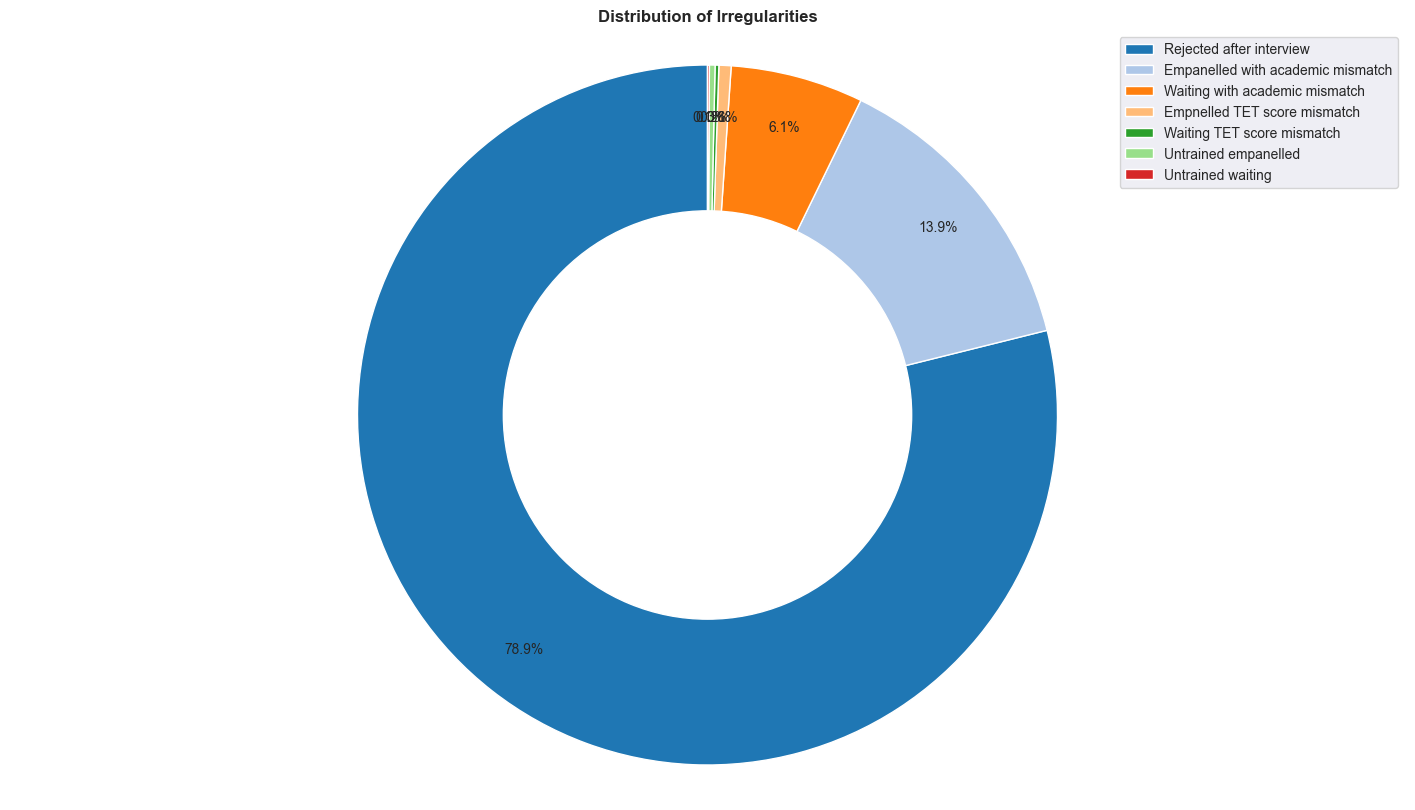

In [142]:
# Make a pie chart

data = {
    'Rejected after interview': total_interviewed - (total_empanelled + total_waiting),
    'Empanelled with academic mismatch': empanelled_ouliers["Roll No"].nunique(),
    'Waiting with academic mismatch': waiting_ouliers["Roll No"].nunique(),
    'Empnelled TET score mismatch': empanelled_tet_mismatch["Roll No"].nunique(),
    'Waiting TET score mismatch': waiting_tet_mismatch["Roll No"].nunique(),
    'Untrained empanelled': empanelled_untrained["Roll No"].nunique(),
    'Untrained waiting': waiting_untrained["Roll No"].nunique(),
}

# Create figure and axis
fig, ax = plt.subplots(figsize=(18, 10))

# Outer circle
outer_circle = plt.pie(data.values(), labels=None, startangle=90, pctdistance=0.85, radius=1.2, autopct='%1.1f%%', colors=plt.cm.tab20.colors)

# Inner circle (donut hole)
inner_circle = plt.pie([1], radius=0.7, colors='w')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Title
plt.title('Distribution of Irregularities', fontweight='bold')

# Legend
plt.legend(data.keys(), loc='upper right')

# Show plot
plt.show()

## 6. RECOMMENDATION
There are clearly some irregualirities practised by the Commission or by the candidates.
* Huge amount of candidates ewere rejected from interview. Cause is not clear as we dont have enough data. But it should'nt be like this
* A great number of candidate have academic mismatch with their filled up form data and panel/waiting data
* There are some mismatch in TET score also
* There are untrained candidates in panel/waiting list

These are very serious irregularities made by the Commission. There is very good opportunity to file case against the Commission to seek their answer.